In [5]:
! pip install -U scikit-learn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [8]:
# 연습용 데이터 가져오기
iris = datasets.load_iris()

In [9]:
# 데이터 내용 추출
iris.data #데이터
iris.target #라벨
iris.target_names #범주종류
iris.feature_names #컬럼이름
print(iris.DESCR) #데이터 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
# 데이터 프레임 만들기
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris_df.species.replace([0,1,2], iris.target_names, inplace=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
#빈도분석
freq_tab = iris_df.species.value_counts()
freq_tab

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [14]:
#빈도분석 (빈도, 상대빈도, 백분율빈도)
freq = iris_df.species.value_counts()
rel_freq = freq/freq.sum()
pct_freq = rel_freq *100
freq_tab = pd.concat([freq, rel_freq, pct_freq], axis=1)
freq_tab.columns = ['빈도', '상대빈도', '백분율빈도']
freq_tab

,빈도,상대빈도,백분율빈도
species,,,
setosa,50,0.333333,33.333333
versicolor,50,0.333333,33.333333
virginica,50,0.333333,33.333333


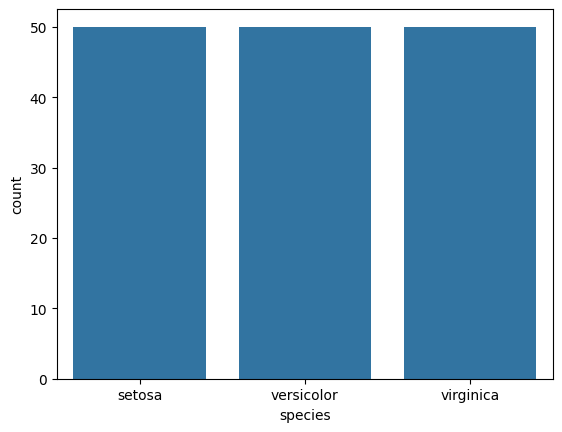

In [15]:
# 빈도그래프
sns.countplot(x=iris_df.species)
plt.show()

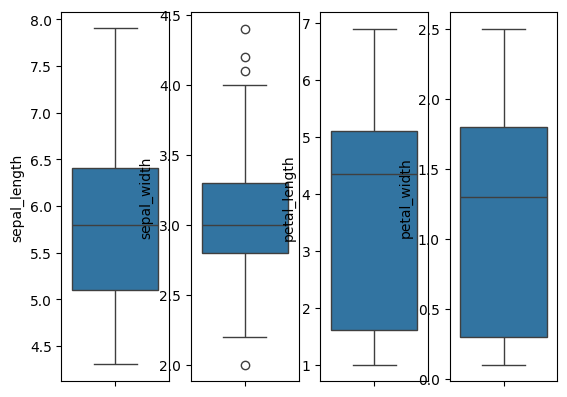

In [16]:
# x변수 박스플랏
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 
                  'petal_width', 'species']
iris_df.columns
plt.subplot(141)
sns.boxplot(y=iris_df.sepal_length)
plt.subplot(142)
sns.boxplot(y=iris_df.sepal_width)
plt.subplot(143)
sns.boxplot(y=iris_df.petal_length)
plt.subplot(144)
sns.boxplot(y=iris_df.petal_width)
plt.show()

In [17]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

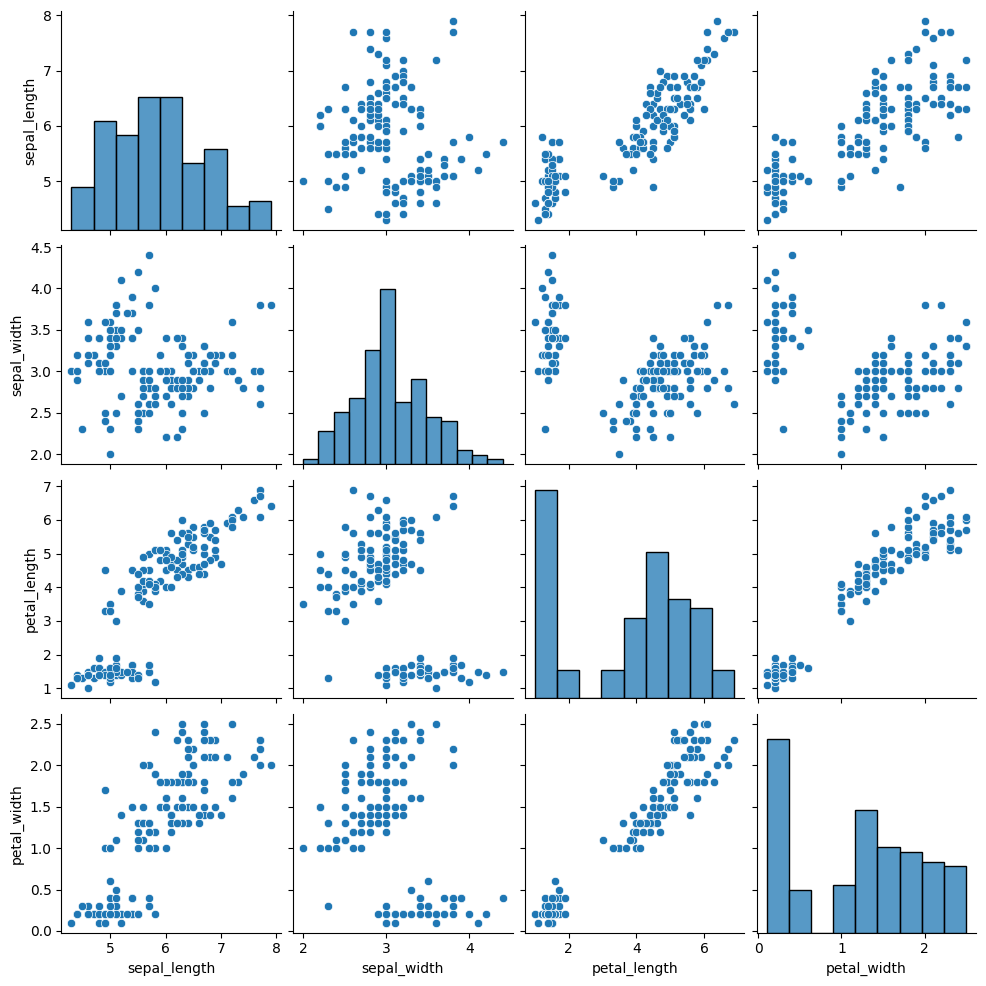

In [18]:
# 산점도
sns.pairplot(iris_df)
plt.show()

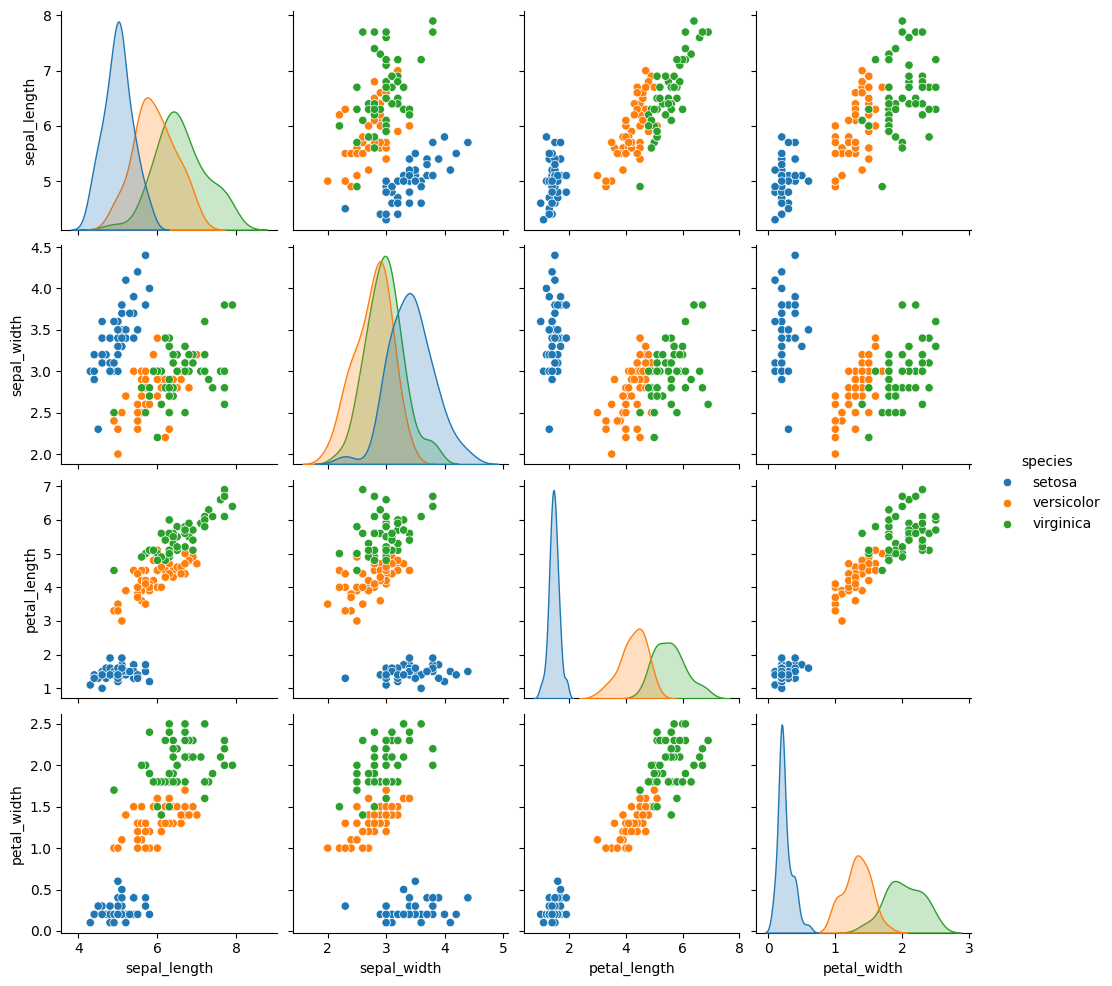

In [19]:
# 산점도
sns.pairplot(iris_df, hue='species')
plt.show()

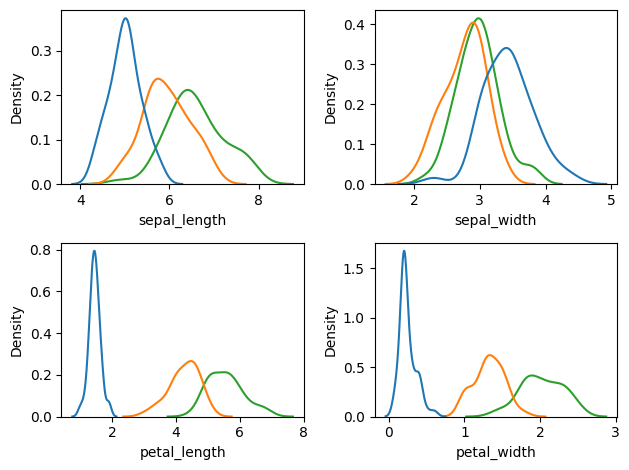

In [20]:
# 밀도그래프
plt.subplot(221)
sns.kdeplot(data=iris_df, x='sepal_length', hue='species', legend=None)
plt.subplot(222)
sns.kdeplot(data=iris_df, x='sepal_width', hue='species', legend=None)
plt.subplot(223)
sns.kdeplot(data=iris_df, x='petal_length', hue='species', legend=None)
plt.subplot(224)
sns.kdeplot(data=iris_df, x='petal_width', hue='species', legend=None)
plt.tight_layout()
plt.show()

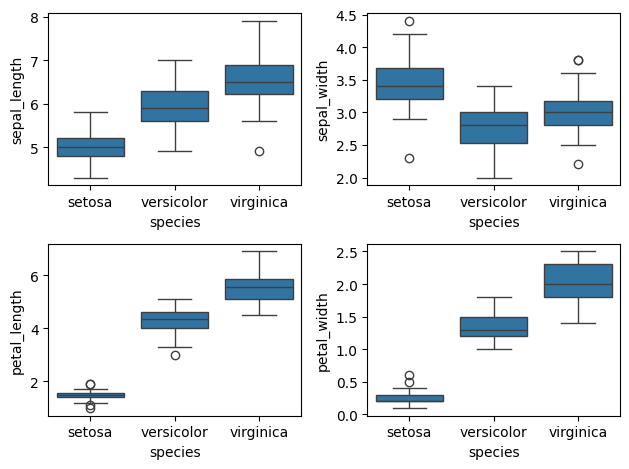

In [21]:
# 박스플랏
plt.subplot(221)
sns.boxplot(data=iris_df, y='sepal_length', x='species')
plt.subplot(222)
sns.boxplot(data=iris_df, y='sepal_width', x='species')
plt.subplot(223)
sns.boxplot(data=iris_df, y='petal_length', x='species')
plt.subplot(224)
sns.boxplot(data=iris_df, y='petal_width', x='species')
plt.tight_layout()
plt.show()

In [23]:
# encoding (글자 데이터를 숫자화)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df.species = le.fit_transform(iris_df.species)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
# x and y split
y = iris_df.species
x = iris_df.drop('species', axis=1)

In [27]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train) #학습
print('기울기: ', log_model.coef_)
print('y절편: ', log_model.intercept_)

기울기:  [[-0.43408086  0.82364183 -2.35105324 -0.96738949]
 [ 0.61878357 -0.42712794 -0.20548623 -0.83127959]
 [-0.18470271 -0.39651389  2.55653946  1.79866909]]
y절편:  [  9.50130347   1.63171875 -11.13302222]


/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train) #학습

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#모델의 정확도 계산
log_model.score(x_test, y_test)

0.9666666666666667

In [30]:
#모델의 정확도 계산
print('훈련데이터 정확도: ', log_model.score(x_train, y_train)) 

훈련데이터 정확도:  0.9833333333333333


In [31]:
print('검증데이터 정확도: ', log_model.score(x_test, y_test))

검증데이터 정확도:  0.9666666666666667


교차검증 평균:  0.9666666666666666
교차검증 표준편차:  0.04082482904638632


/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

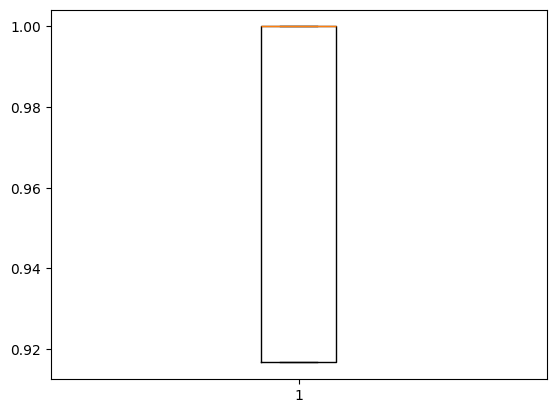

In [32]:
# 교차검증
from sklearn.model_selection import cross_val_score
log_cv = cross_val_score(log_model, x_train, y_train, cv=10, 
                scoring='accuracy')
print('교차검증 평균: ', log_cv.mean())
print('교차검증 표준편차: ', log_cv.std())
plt.boxplot(log_cv)
plt.show()